In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [144]:
df = pd.read_csv('train.csv')

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
df[df['Age'].isna()].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          158
Embarked         0
dtype: int64

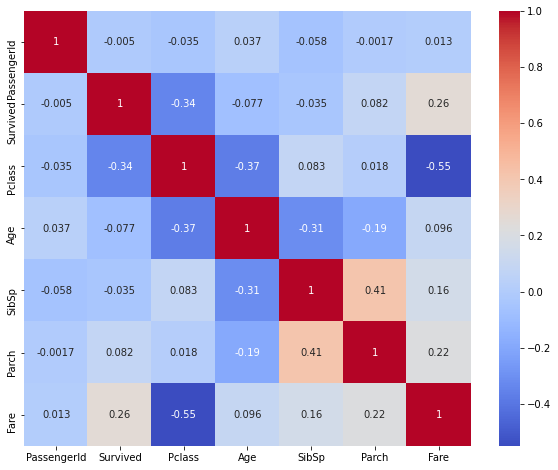

In [148]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

In [149]:
#populate the age with the aveage age of the same gender, and ticket class
hmp_age = dict(df.groupby(['Sex', 'Pclass']).mean()['Age'])
#hmp_age = dict(df.groupby(['Sex', 'Pclass']).mean()['Age'])
df['Age'] = df.apply( lambda x: round(hmp_age[( x['Sex'], x['Pclass'])]) if np.isnan(x['Age'])  else x['Age'], axis = 1 )


In [150]:
df.isna().sum()
len(df)

891

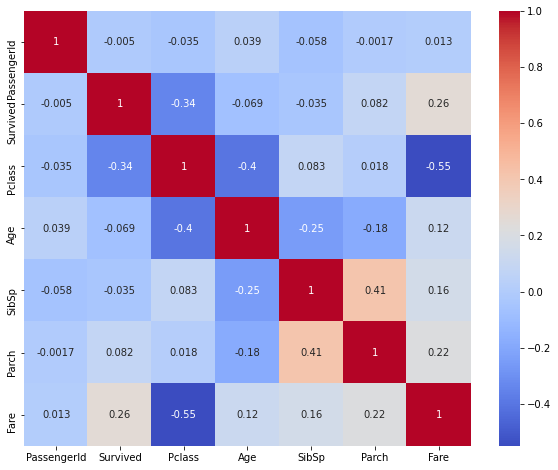

In [151]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

In [152]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [153]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
F33            3
              ..
A36            1
D45            1
B19            1
D48            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [154]:
df= df.drop(['PassengerId', 'Name', 'Cabin'], axis = 1)

In [155]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [156]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [157]:
# df[df['Embarked'].isna()]
# df['Embarked'] = df.apply(lambda x : 'O' if pd.isnull(x['Embarked']) else x['Embarked'], axis=1 )

In [158]:
df = df.drop('Embarked', axis=1)

In [159]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [160]:
df.select_dtypes(['object']).columns

Index(['Sex', 'Ticket'], dtype='object')

In [161]:
df['Ticket'].value_counts()

CA. 2343              7
347082                7
1601                  7
CA 2144               6
347088                6
                     ..
PC 17318              1
3474                  1
STON/O 2. 3101292     1
SOTON/O.Q. 3101306    1
250646                1
Name: Ticket, Length: 681, dtype: int64

In [162]:
df = df.drop('Ticket', axis = 1)

In [163]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [164]:
dummies = pd.get_dummies(df[['Sex']])
df = pd.concat([df.drop(['Sex'], axis = 1), dummies], axis =1)


In [165]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,22.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


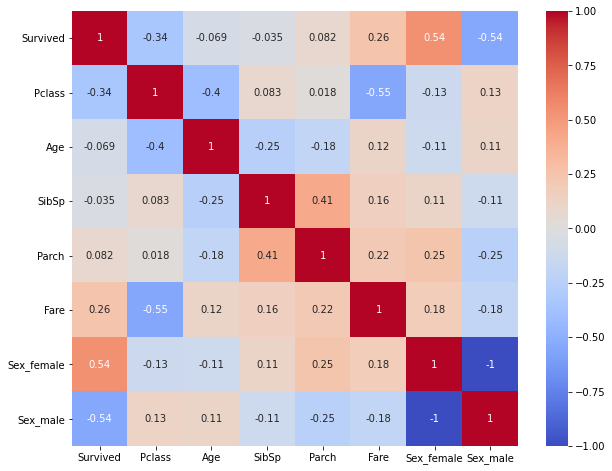

In [166]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

# Below is Model


In [167]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime

In [168]:
datetime.now().strftime("%Y-%m-%d--%H%M")
# WINDOWS: Use "logs\\fit"
# MACOS/LINUX: Use "logs/fit"

log_directory = 'logs/fit'



# OPTIONAL: ADD A TIMESTAMP FOR UNIQUE FOLDER
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '/' + timestamp


board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)


In [201]:
len(df.columns)

8

In [218]:
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

model = Sequential()

model.add(Dense(8, activation = 'relu'))
# model.add(Dropout(0.2))

model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')


early_stop =  EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25 )
model.fit(x = X_train, y=y_train, epochs=50, validation_data=(X_test, y_test), callbacks = [board])  #,early_stop])



Train on 757 samples, validate on 134 samples
Epoch 1/50
757/757 [==============================] - 2s 3ms/sample - loss: 1.0735 - val_loss: 0.8352
Epoch 2/50
757/757 [==============================] - 0s 272us/sample - loss: 0.8589 - val_loss: 0.7643
Epoch 3/50
757/757 [==============================] - 0s 272us/sample - loss: 0.7789 - val_loss: 0.7309
Epoch 4/50
757/757 [==============================] - 0s 276us/sample - loss: 0.7236 - val_loss: 0.7117
Epoch 5/50
757/757 [==============================] - 0s 284us/sample - loss: 0.6782 - val_loss: 0.6937
Epoch 6/50
757/757 [==============================] - 0s 290us/sample - loss: 0.6675 - val_loss: 0.6797
Epoch 7/50
757/757 [==============================] - 0s 285us/sample - loss: 0.6424 - val_loss: 0.6657
Epoch 8/50
757/757 [==============================] - 0s 296us/sample - loss: 0.6081 - val_loss: 0.6548
Epoch 9/50
757/757 [==============================] - 0s 287us/sample - loss: 0.6147 - val_loss: 0.6418
Epoch 10/50
757/757 

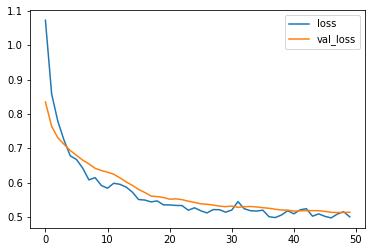

In [219]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [220]:
from sklearn.metrics import classification_report, confusion_matrix
predicts=model.predict_classes(X_test)
print(classification_report(y_test, predicts))


confusion_matrix(y_test, predicts)

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        70
           1       0.84      0.58      0.69        64

    accuracy                           0.75       134
   macro avg       0.77      0.74      0.74       134
weighted avg       0.77      0.75      0.74       134



array([[63,  7],
       [27, 37]], dtype=int64)

In [221]:
df_predict = pd.read_csv('test.csv')
df_predict['Age'] = df_predict.apply( lambda x: round(hmp_age[( x['Sex'], x['Pclass'])]) if np.isnan(x['Age'])  else x['Age'], axis = 1 )
df_predict= df_predict.drop(['PassengerId', 'Name', 'Cabin','Ticket','Embarked'], axis = 1)
dummies_predict = pd.get_dummies(df_predict[['Sex']])
df_predict = pd.concat([df_predict.drop(['Sex'], axis = 1), dummies_predict], axis =1)
X_predict = df_predict.values
model.predict_classes(X_predict)
#print(df.columns)
#print(df_predict.columns )




/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/keras/engine/sequential.py:342: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    